# 2110433 - Computer Vision (2024/2)
## Lab 5 - Texture
In this lab, we will learn to use texture to segment 'things' from images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer. <br>
<b>Please note that collaboration is encouraged in this course.</b> You must turn in <b>your own write ups</b> of all problems. If you collaborate with others, you must put the names and ids of the students you worked with in below block.

<b>Remark : You need to install addition package name 'scikit-image' by using the following command line</b>

Collaboration List:
- ...
- ...

In [1]:
import numpy as np
import cv2
from skimage import io, color
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive
import ipywidgets as widgets

%matplotlib inline

## Gray Level Co-Occurrence Matrix (GLCM)
A gray level co-occurrence Matrix is a matrix that is defined over an image to be the distribution of co-occurring pixel values at a given offset. It is used as an approach to texture analysis with various computer vision applications.

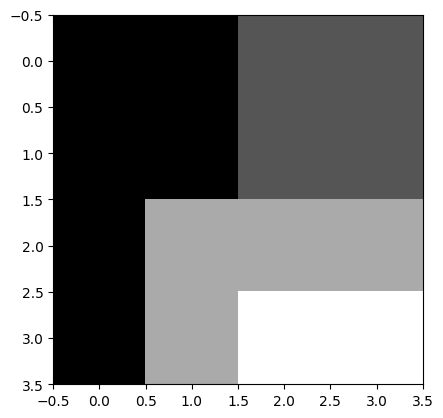

In [2]:
patternImage = np.array([
    [0, 0, 1, 1], 
    [0, 0, 1, 1], 
    [0, 2, 2, 2], 
    [0, 2, 3, 3]], dtype=np.uint8)

plt.imshow(patternImage, cmap="gray")
plt.show()

We will use <a href="https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#skimage.feature.greycomatrix">greycomatrix</a> function from scikit-image to extract GLCM from the sample pattern.

In [3]:
co_ocmatrix = graycomatrix(patternImage, distances=[1], angles=[0, np.pi / 4, np.pi / 2], levels=4)
print(co_ocmatrix.shape)
print("angle 0")
print(co_ocmatrix[:, :, 0, 0])

print("angle 45")
print(co_ocmatrix[:, :, 0, 1])

print("angle 90")
print(co_ocmatrix[:, :, 0, 2])

(4, 4, 1, 3)
angle 0
[[2 2 2 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 1]]
angle 45
[[1 1 3 0]
 [0 1 1 0]
 [0 0 0 2]
 [0 0 0 0]]
angle 90
[[4 0 1 0]
 [0 2 2 0]
 [0 0 1 2]
 [0 0 0 0]]


### GLCM texture properties
Fron the  GLCM we can compute the following texture properties by using <a href='https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#skimage.feature.graycoprops'>graycoprops</a> from scikit-image
- contrast $\sum_{i,j=0}^{levels-1} P_{i,j}(i-j)^2$
- dissimilarity $\sum_{i,j=0}^{levels-1}P_{i,j}|i-j|$
- homogeneity $\sum_{i,j=0}^{levels-1}\frac{P_{i,j}}{1+(i-j)^2}$
- correlation $\sum_{i,j=0}^{levels-1} P_{i,j}\left[\frac{(i-\mu_i)(j-\mu_j)}{\sqrt{(\sigma_i^2)(\sigma_j^2)}}\right]$

In [23]:
contrast = graycoprops(co_ocmatrix, prop="contrast")
dissimilarity = graycoprops(co_ocmatrix, prop="dissimilarity")
homogeneity = graycoprops(co_ocmatrix, prop="homogeneity")

# print(contrast, dissimilarity, homogeneity)
print("contrast: ", contrast)
print("dissimilarity: ", dissimilarity)
print("homogeneity: ", homogeneity)

contrast:  [[0.91666667 1.77777778 0.66666667]]
dissimilarity:  [[0.58333333 1.11111111 0.5       ]]
homogeneity:  [[0.74166667 0.51111111 0.76666667]]


In [24]:
patternImage2 = np.zeros((4, 4), dtype=np.uint8)  ## all black image!
co_ocmatrix2 = graycomatrix(patternImage2, distances=[1], angles=[0, np.pi / 4, np.pi / 2])

contrast2 = graycoprops(co_ocmatrix2, prop="contrast")
dissimilarity2 = graycoprops(co_ocmatrix2, prop="dissimilarity")
homogeneity2 = graycoprops(co_ocmatrix2, prop="homogeneity")

# print(contrast2, dissimilarity2, homogeneity2)
print("contrast2: ", contrast2)
print("dissimilarity2: ", dissimilarity2)
print("homogeneity2: ", homogeneity2)

contrast2:  [[0. 0. 0.]]
dissimilarity2:  [[0. 0. 0.]]
homogeneity2:  [[1. 1. 1.]]


### Co-Occurrence matrix patch matching on bridge defect problem

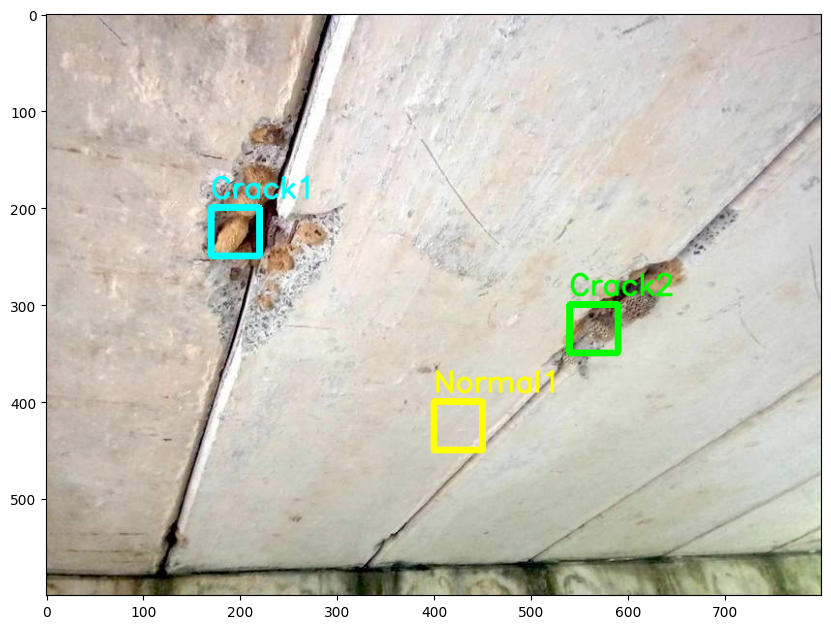

In [25]:
bridgeDefectImage = cv2.imread("assets/Lab5-crack.jpg")
dispImage = cv2.cvtColor(bridgeDefectImage.copy(), cv2.COLOR_BGR2RGB)

# Sample crack
cv2.rectangle(dispImage, (170, 200), (220, 250), (0, 255, 255), 5)
cv2.putText(dispImage, "Crack1", (170, 190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

# Normal1
cv2.rectangle(dispImage, (400, 400), (450, 450), (255, 255, 0), 5)
cv2.putText(dispImage, "Normal1", (400, 390), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)

# Crack2
cv2.rectangle(dispImage, (540, 300), (590, 350), (0, 255, 0), 5)
cv2.putText(dispImage, "Crack2", (540, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)


plt.figure(figsize=(10, 10))
plt.imshow(dispImage, cmap="gray")

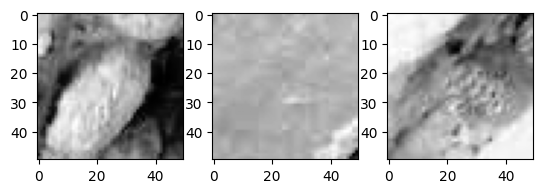

In [37]:
bridgeDefectImageGray = cv2.cvtColor(bridgeDefectImage, cv2.COLOR_BGR2GRAY)

crackPatch1 = bridgeDefectImageGray[200:250, 170:220]

normalPatch1 = bridgeDefectImageGray[400:450, 400:450]

crackPatch2 = bridgeDefectImageGray[300:350, 540:590]

_, axarr = plt.subplots(1, 3)
axarr[0].imshow(crackPatch1, cmap="gray")
axarr[1].imshow(normalPatch1, cmap="gray")
axarr[2].imshow(crackPatch2, cmap="gray")

In [38]:
co_ocmatrix_crackpatch1 = graycomatrix(
    crackPatch1, distances=[1], angles=[0, np.pi / 4, np.pi / 2], symmetric=True, normed=True
)

co_ocmatrix_normalpatch1 = graycomatrix(
    normalPatch1, distances=[1], angles=[0, np.pi / 4, np.pi / 2], symmetric=True, normed=True
)

co_ocmatrix_crackpatch2 = graycomatrix(
    crackPatch2, distances=[1], angles=[0, np.pi / 4, np.pi / 2], symmetric=True, normed=True
)

In [39]:
dist_normal_normal = np.linalg.norm(co_ocmatrix_crackpatch1 - co_ocmatrix_crackpatch2)
print("distance crack-crack", dist_normal_normal)

dist_normal_crack = np.linalg.norm(co_ocmatrix_crackpatch1 - co_ocmatrix_normalpatch1)
print("distance normal-crack", dist_normal_crack)

distance crack-crack 0.04674394760128205
distance normal-crack 0.18849482835715067


## Local Binary Pattern (LBP)
Local Binary Pattern (LBP) is a efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.  It can be seen as a unifying approach to the traditionally divergent statistical and structural models of texture analysis. The most important property of the LBP operator in real-world applications is its robustness to monotonic gray-scale changes caused, for example, by illumination variations. Another important property is its computational simplicity, which makes it possible to analyze images in challenging real-time settings.

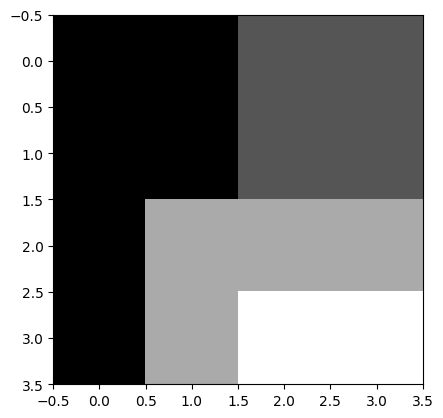

In [40]:
patternImage = np.array([[0, 0, 1, 1], [0, 0, 1, 1], [0, 2, 2, 2], [0, 2, 3, 3]], dtype=np.uint8)

plt.imshow(patternImage, cmap="gray")
plt.show()

In [41]:
lbpfeature = local_binary_pattern(patternImage, 8, 1)

Calculate LBP pattern for each patch by using scikit-image <a href="https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#skimage.feature.local_binary_pattern">local_binary_pattern</a> <br>
<img src="./assets/Lab5-LBP.jpg"/><br> Three neighborhood examples with varying p and r used to construct Local Binary Patterns. (Image from <a href="https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/">pyimagesearch</a>)

[[255. 255. 193. 112.]
 [255. 255. 231. 124.]
 [255. 193. 241. 112.]
 [255.   7.   1.  16.]]


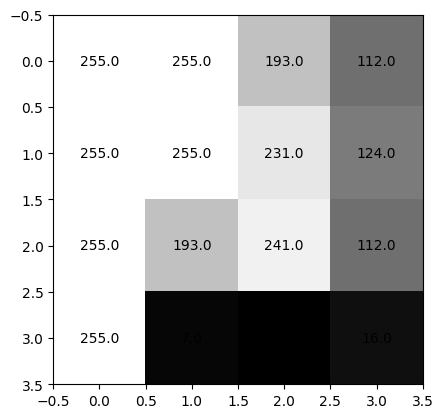

In [45]:
plt.imshow(lbpfeature, cmap="gray")
# plot value in each pixel
for i in range(4):
    for j in range(4):
        plt.text(j, i, lbpfeature[i, j], ha="center", va="center")
print(lbpfeature)

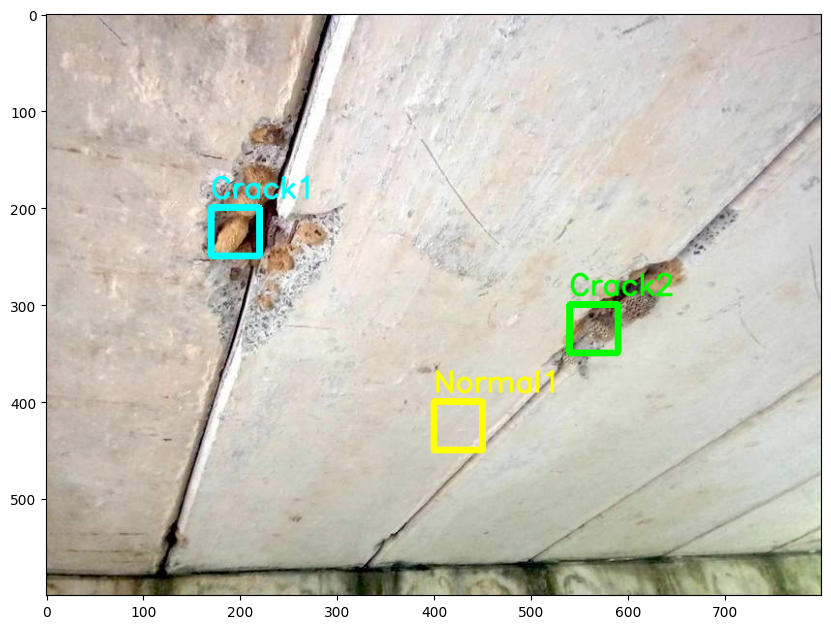

In [32]:
bridgeDefectImage = cv2.imread("assets/Lab5-crack.jpg")
dispImage = cv2.cvtColor(bridgeDefectImage.copy(), cv2.COLOR_BGR2RGB)

# Sample crack
cv2.rectangle(dispImage, (170, 200), (220, 250), (0, 255, 255), 5)
cv2.putText(dispImage, "Crack1", (170, 190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

# Normal1
cv2.rectangle(dispImage, (400, 400), (450, 450), (255, 255, 0), 5)
cv2.putText(dispImage, "Normal1", (400, 390), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)

# Crack2
cv2.rectangle(dispImage, (540, 300), (590, 350), (0, 255, 0), 5)
cv2.putText(dispImage, "Crack2", (540, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)


plt.figure(figsize=(10, 10))
plt.imshow(dispImage, cmap="gray")

In [33]:
lbp_crackpatch1 = local_binary_pattern(crackPatch1, P=16, R=8, method="uniform")
lbp_normalpatch1 = local_binary_pattern(normalPatch1, P=16, R=8, method="uniform")
lbp_crackpatch2 = local_binary_pattern(crackPatch2, P=16, R=8, method="uniform")

### LBP histogram

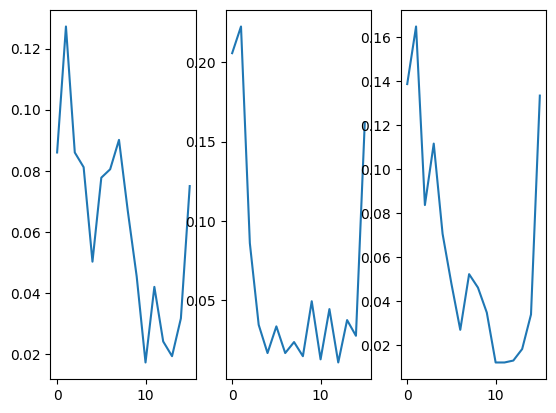

In [34]:
nBin = 16

_, axarr = plt.subplots(1, 3)

hist_crackpatch1, _ = np.histogram(lbp_crackpatch1, density=True, bins=nBin, range=(0, nBin))
axarr[0].plot(hist_crackpatch1)

hist_normalpatch1, _ = np.histogram(lbp_normalpatch1, density=True, bins=nBin, range=(0, nBin))
axarr[1].plot(hist_normalpatch1)

hist_crackpatch2, _ = np.histogram(lbp_crackpatch2, density=True, bins=nBin, range=(0, nBin))
axarr[2].plot(hist_crackpatch2)

plt.show()

### LBP Histogram matching

#### Simple euclidean distance

In [35]:
print("Eucliden distance between crack-crack", np.linalg.norm(hist_crackpatch1 - hist_crackpatch2))
print("Eucliden distance between crack-normal", np.linalg.norm(hist_crackpatch1 - hist_normalpatch1))

Eucliden distance between crack-crack 0.1250927629301786
Eucliden distance between crack-normal 0.21904259947293234


#### KL divergence is a way of measuring the matching between two distributions 
(More detail can  be read from <a href="https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-kl-divergence-2b382ca2b2a8">here</a>)

In [36]:
def kldivergence(p, q):
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


print("KL-Divergence between crack-crack", kldivergence(hist_crackpatch1, hist_crackpatch2))
print("KL-Divergence between crack-normal", kldivergence(hist_crackpatch1, hist_normalpatch1))

KL-Divergence between crack-crack 0.18014212991374018
KL-Divergence between crack-normal 0.49131425627283865


## Assignment 1 - Texture Segmentation

From the above section, we can magically matching each texture with sample patches. Your today task is to implement a program to segment this leopard from the background by using chosen texture feature and sliding window method. You can search and use any knowledge from internet but do not forget to proper credit your sources. <br>
<img src="./assets/Lab5-leopard.jpg"/>

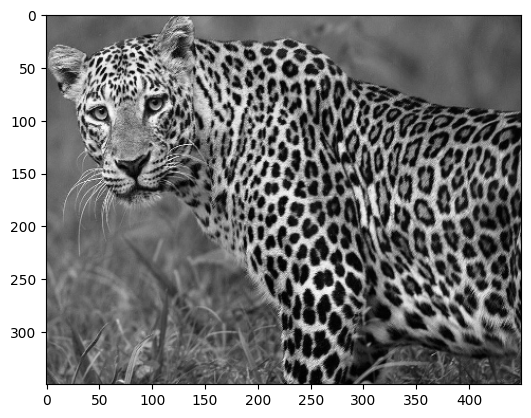

<Figure size 640x480 with 0 Axes>

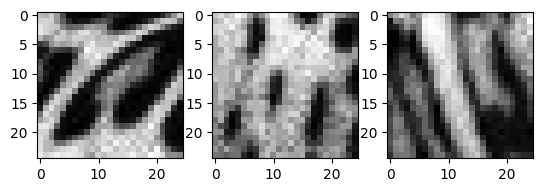

<Figure size 640x480 with 0 Axes>

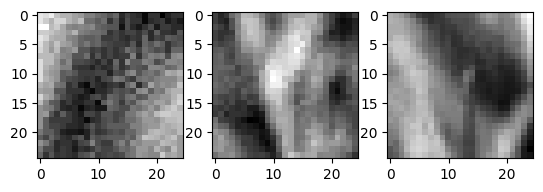

In [139]:
leopardImage = cv2.imread("assets/Lab5-leopard.jpg", cv2.IMREAD_GRAYSCALE)
leopardImage = cv2.resize(leopardImage, (450, 350))

# Just sample patches, you can change to any position you want
PAD_SIZE = 25
leopardPatch1 = leopardImage[100:125, 400:425]
leopardPatch2 = leopardImage[100:125, 150:175]
leopardPatch3 = leopardImage[200:225, 300:325]

nonleopardPatch1 = leopardImage[0:25, 400:425]
nonleopardPatch2 = leopardImage[250:275, 0:25]
nonleopardPatch3 = leopardImage[250:275, 100:125]


plt.figure()
plt.imshow(leopardImage, cmap="gray")

plt.figure()
_, axarr = plt.subplots(1, 3)
axarr[0].imshow(leopardPatch1, cmap="gray")
axarr[1].imshow(leopardPatch2, cmap="gray")
axarr[2].imshow(leopardPatch3, cmap="gray")

plt.figure()
_, axarr = plt.subplots(1, 3)
axarr[0].imshow(nonleopardPatch1, cmap="gray")
axarr[1].imshow(nonleopardPatch2, cmap="gray")
axarr[2].imshow(nonleopardPatch3, cmap="gray")

In [57]:
%pip install -q seaborn
import numpy as np
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


<Axes: >

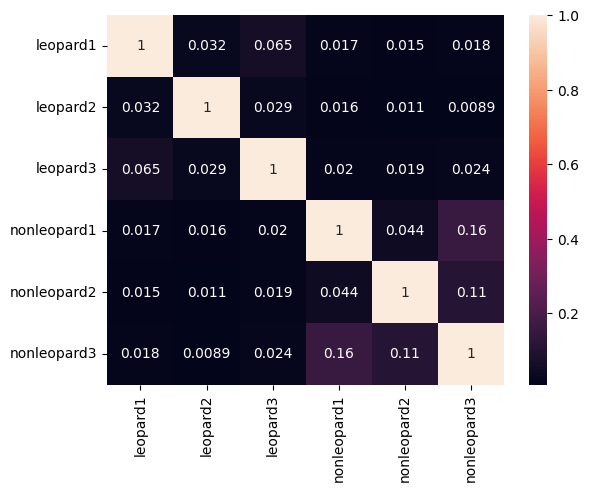

In [174]:
def extract_image_texture(image: np.ndarray, grey_level: int = 256) -> np.ndarray:
    image = image.astype(np.uint8)

    # Enhance edges
    image = image + cv2.Laplacian(image, cv2.CV_64F)
    image = np.clip(image, 0, 255).astype(np.uint8)

    # Apply GLCM
    glcm = graycomatrix(image, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=grey_level)

    return glcm.flatten()


leopard_patches = [leopardPatch1, leopardPatch2, leopardPatch3]
leopard_names = ["leopard1", "leopard2", "leopard3"]
nonleopard_patches = [nonleopardPatch1, nonleopardPatch2, nonleopardPatch3]
nonleopard_names = ["nonleopard1", "nonleopard2", "nonleopard3"]

all_patches = leopard_patches + nonleopard_patches
all_names = leopard_names + nonleopard_names

# Extract features
features = np.array([extract_image_texture(patch) for patch in all_patches])

# Compute similarity matrix
similarity_matrix = np.zeros((len(all_patches), len(all_patches)))
for i in range(len(all_patches)):
    for j in range(len(all_patches)):
        # Compute similarity using cosine similarity
        similarity_matrix[i, j] = np.dot(features[i], features[j]) / (
            np.linalg.norm(features[i]) * np.linalg.norm(features[j])
        )

# Plot similarity matrix
sns.heatmap(similarity_matrix, annot=True, xticklabels=all_names, yticklabels=all_names)


In [171]:
def classify_image_texture(image: np.ndarray, positive_class_samples: list, negative_class_samples: list) -> float:
    # Extract features
    features = np.array([extract_image_texture(image) for _ in range(2)])

    # Compute similarity with positive and negative class
    positive_similarity = np.mean(
        [
            np.dot(features[0], extract_image_texture(positive_sample))
            / (np.linalg.norm(features[0]) * np.linalg.norm(extract_image_texture(positive_sample)))
            for positive_sample in positive_class_samples
        ]
    )

    negative_similarity = np.mean(
        [
            np.dot(features[1], extract_image_texture(negative_sample))
            / (np.linalg.norm(features[1]) * np.linalg.norm(extract_image_texture(negative_sample)))
            for negative_sample in negative_class_samples
        ]
    )

    # Return probability of positive class
    return positive_similarity / (positive_similarity + negative_similarity)

In [208]:
# Classify
segmented_leopard = np.zeros_like(leopardImage, dtype=np.float32)
for start_patch_x in range(0, leopardImage.shape[1], PAD_SIZE):
    for start_patch_y in range(0, leopardImage.shape[0], PAD_SIZE):
        patch = leopardImage[start_patch_y:start_patch_y + PAD_SIZE, start_patch_x:start_patch_x + PAD_SIZE]
        # is_leopard = classify_image_texture(patch, leopard_patches, nonleopard_patches)
        # if is_leopard:
        #     segmented_leopard[start_patch_y:start_patch_y + PAD_SIZE, start_patch_x:start_patch_x + PAD_SIZE] = 255
        positive_similarity = classify_image_texture(patch, leopard_patches, nonleopard_patches)
        
        segmented_leopard[start_patch_y:start_patch_y + PAD_SIZE, start_patch_x:start_patch_x + PAD_SIZE] = positive_similarity

def visualize_segmentation(image, segmented_image):
    # Make a visualization
    result_image = image.copy()
    result_image = cv2.cvtColor(result_image, cv2.COLOR_GRAY2RGB)
    ## Add more red on non-leopard
    result_image[:, :, 0] = result_image[:, :, 0] * (1 - segmented_image)
    ## Add more green on leopard
    result_image[:, :, 1] = result_image[:, :, 1] * segmented_image

    # Add probability value
    for start_patch_x in range(0, image.shape[1], PAD_SIZE):
        for start_patch_y in range(0, image.shape[0], PAD_SIZE):
            patch = segmented_image[start_patch_y:start_patch_y + PAD_SIZE, start_patch_x:start_patch_x + PAD_SIZE]
            cv2.putText(result_image, str(int(patch[0, 0]*100)), (start_patch_x, start_patch_y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1, cv2.LINE_AA)

    # Display
    plt.figure()
    plt.imshow(result_image)
    plt.show()

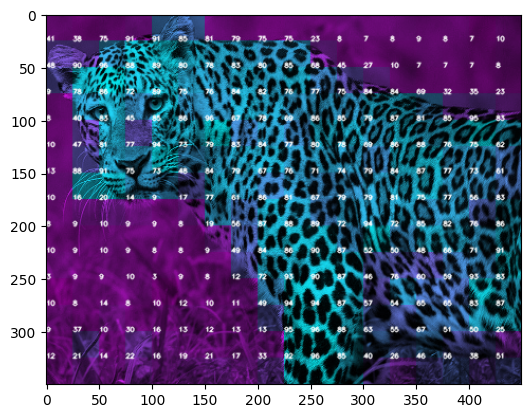

In [209]:
visualize_segmentation(leopardImage, segmented_leopard)